# Maxwell's Equations Exploration

In this Jupyter Notebook, we will explore **Maxwell's Equations**, fundamental to classical electromagnetism. We will use `numpy` for numerical operations, `matplotlib` for visualizations, and `sympy` for symbolic manipulations to understand these equations.

## Maxwell's Equations: An Overview

Maxwell's equations are a set of four partial differential equations that, together with the Lorentz force law, form the foundation of classical electromagnetism, classical optics, and electric circuits. They describe how electric and magnetic fields are generated by and interact with each other and with electric charges and currents.

The four equations are:

1. **Gauss's Law for Electricity:** Describes how electric fields originate from electric charges.
2. **Gauss's Law for Magnetism:** States that there are no magnetic monopoles.
3. **Faraday's Law of Induction:** Describes how a time-varying magnetic field creates an electric field.
4. **Ampère‑Maxwell Law:** Describes how magnetic fields are generated by electric currents and time‑varying electric fields.

Let's explore each equation in detail.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import sympy
from sympy import symbols, Function, Eq, Derivative, integrate, cos, sin, pi
from mpl_toolkits.mplot3d import Axes3D

## 1. Gauss's Law for Electricity

**Differential Form:**
$$\nabla \cdot \mathbf{E} = \frac{\rho}{\epsilon_0}$$

**Integral Form:**
$$\oint_S \mathbf{E} \cdot d\mathbf{A} = \frac{Q_{enc}}{\epsilon_0}$$

Where:

* $\mathbf{E}$ is the electric field.
* $\rho$ is the electric charge density.
* $\epsilon_0$ is the permittivity of free space.
* $d\mathbf{A}$ is an infinitesimal area vector on a closed surface $S$.
* $Q_{enc}$ is the total charge enclosed within the surface $S$.

This law states that the electric flux through any closed surface is proportional to the total electric charge enclosed within that surface. It essentially tells us that electric field lines begin and end on electric charges.

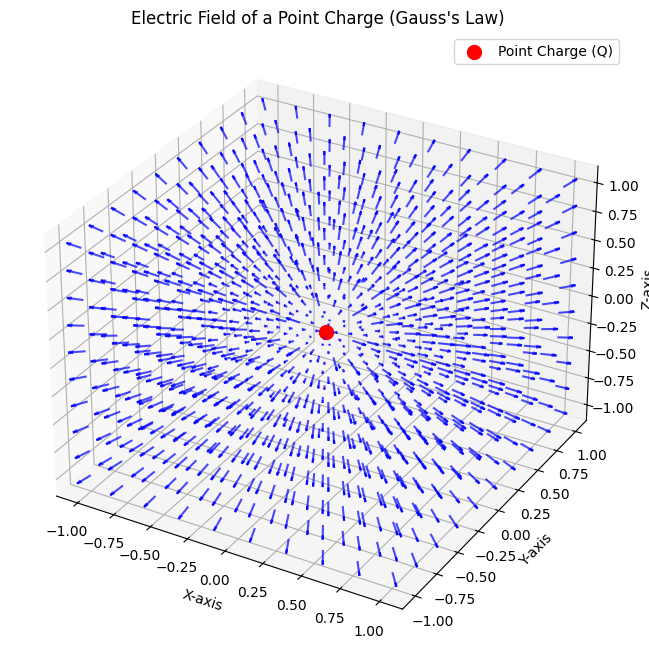


Symbolic Electric Field Components (for a point charge at origin):
Ex = 8.9875*x/(x**2 + y**2 + z**2)**(3/2)
Ey = 8.9875*y/(x**2 + y**2 + z**2)**(3/2)
Ez = 8.9875*z/(x**2 + y**2 + z**2)**(3/2)


In [6]:
import numpy as np
import matplotlib.pyplot as plt
import sympy
from sympy import symbols, Function, Eq, Derivative, integrate, cos, sin, pi
from mpl_toolkits.mplot3d import Axes3D
from sympy.vector import divergence, curl, gradient, CoordSys3D # Ensure these are imported

# Constants
k = 8.9875e9  # Coulomb's constant (1 / (4 * pi * epsilon_0))
Q = 1e-9      # Charge in Coulombs

# Create a grid for visualization (NUMPY for plotting)
x_np = np.linspace(-1, 1, 10)
y_np = np.linspace(-1, 1, 10)
z_np = np.linspace(-1, 1, 10)
X, Y, Z = np.meshgrid(x_np, y_np, z_np)

# Calculate the electric field components (NUMPY for plotting)
r = np.sqrt(X**2 + Y**2 + Z**2)
r[r == 0] = 1e-9  # Avoid division by zero at the origin

Ex = k * Q * X / r**3
Ey = k * Q * Y / r**3
Ez = k * Q * Z / r**3

# Plotting the electric field vectors
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Quiver plot to show electric field vectors
ax.quiver(X, Y, Z, Ex, Ey, Ez, length=0.1, normalize=True, color='blue', alpha=0.7)

# Plot the charge at the origin
ax.scatter([0], [0], [0], color='red', s=100, label='Point Charge (Q)')

ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis')
ax.set_title("Electric Field of a Point Charge (Gauss's Law)")
ax.legend()
plt.show()

# Symbolic representation (SymPy) - Define x, y, z as symbols for this part
x_sym, y_sym, z_sym = symbols('x y z')
r_sym = sympy.sqrt(x_sym**2 + y_sym**2 + z_sym**2)

# Ensure k and Q are also treated symbolically if you want them in the expression,
# or convert their numerical values to SymPy expressions.
# For simplicity, let's keep them as numerical constants for now in the print statement,
# but if you were doing further symbolic math with them, you'd define them as symbols too.
E_sym_x = k * Q * x_sym / r_sym**3
E_sym_y = k * Q * y_sym / r_sym**3
E_sym_z = k * Q * z_sym / r_sym**3

print("\nSymbolic Electric Field Components (for a point charge at origin):")
print(f"Ex = {E_sym_x}")
print(f"Ey = {E_sym_y}")
print(f"Ez = {E_sym_z}")

## 2. Gauss's Law for Magnetism

**Differential Form:**
$$\nabla \cdot \mathbf{B} = 0$$

**Integral Form:**
$$\oint_S \mathbf{B} \cdot d\mathbf{A} = 0$$

This law states that the net magnetic flux through any closed surface is always zero, implying that there are no magnetic monopoles. Magnetic field lines always form closed loops.

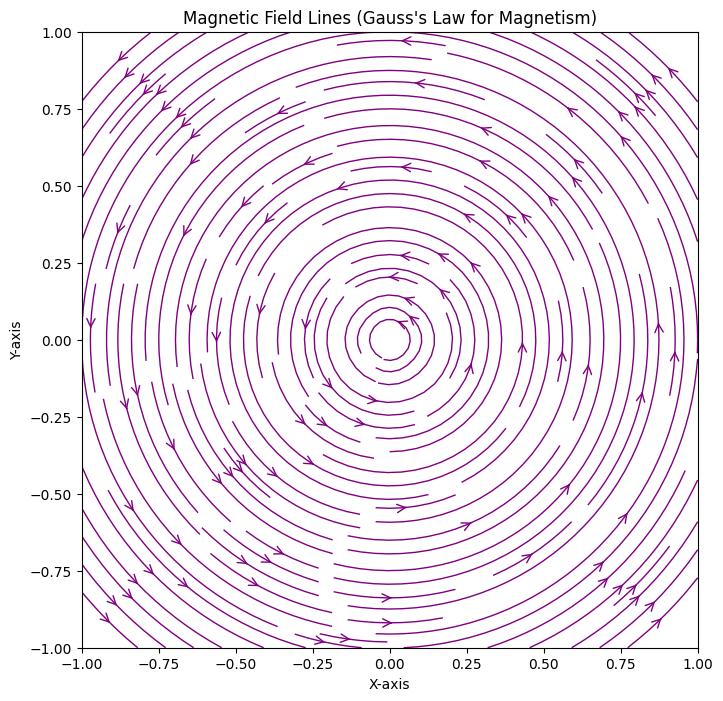


Symbolic Divergence of a Magnetic Field (example with zero divergence):
Divergence of B = 0


In [3]:
# Create a grid for visualization (2D loop)
x_mag = np.linspace(-1, 1, 20)
y_mag = np.linspace(-1, 1, 20)
X_mag, Y_mag = np.meshgrid(x_mag, y_mag)

r_mag = np.sqrt(X_mag**2 + Y_mag**2)
r_mag[r_mag == 0] = 1e-9

Bx_mag = -Y_mag / r_mag**2
By_mag = X_mag / r_mag**2

# Normalize for visualization
B_mag_norm = np.sqrt(Bx_mag**2 + By_mag**2)
Bx_mag_norm = Bx_mag / B_mag_norm
By_mag_norm = By_mag / B_mag_norm

plt.figure(figsize=(8, 8))
plt.streamplot(X_mag, Y_mag, Bx_mag_norm, By_mag_norm, color='purple', linewidth=1, density=1.5, arrowstyle='->', arrowsize=1.5)
plt.title("Magnetic Field Lines (Gauss's Law for Magnetism)")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

from sympy import symbols
from sympy.vector import divergence, CoordSys3D

x_sym, y_sym, z_sym = symbols('x y z')
Bx_zero_div = y_sym
By_zero_div = -x_sym

R = CoordSys3D('R')
B_vec_sym = R.y * R.i - R.x * R.j
div_B_sym_full = divergence(B_vec_sym)

print("\nSymbolic Divergence of a Magnetic Field (example with zero divergence):")
print(f"Divergence of B = {div_B_sym_full}")

## 3. Faraday's Law of Induction

**Differential Form:**
$$\nabla \times \mathbf{E} = - \frac{\partial \mathbf{B}}{\partial t}$$

**Integral Form:**
$$\oint_C \mathbf{E} \cdot d\mathbf{l} = - \frac{d\Phi_B}{dt}$$

Faraday's Law describes how a changing magnetic flux induces an electromotive force, producing an electric field.

dB/dt =
 Matrix([[0], [0], [-B_0*omega*sin(omega*t)]])

Example Induced Electric Field E =
 Matrix([[B_0*omega*y*sin(omega*t)/2], [-B_0*omega*x*sin(omega*t)/2], [0]])

Curl of E field =
 (-B_0*omega*sin(omega*t))*R.k


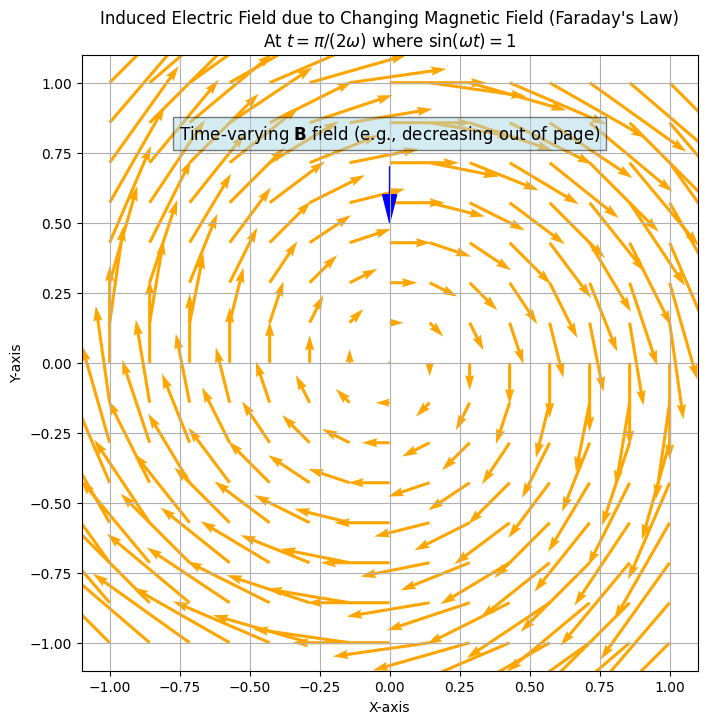

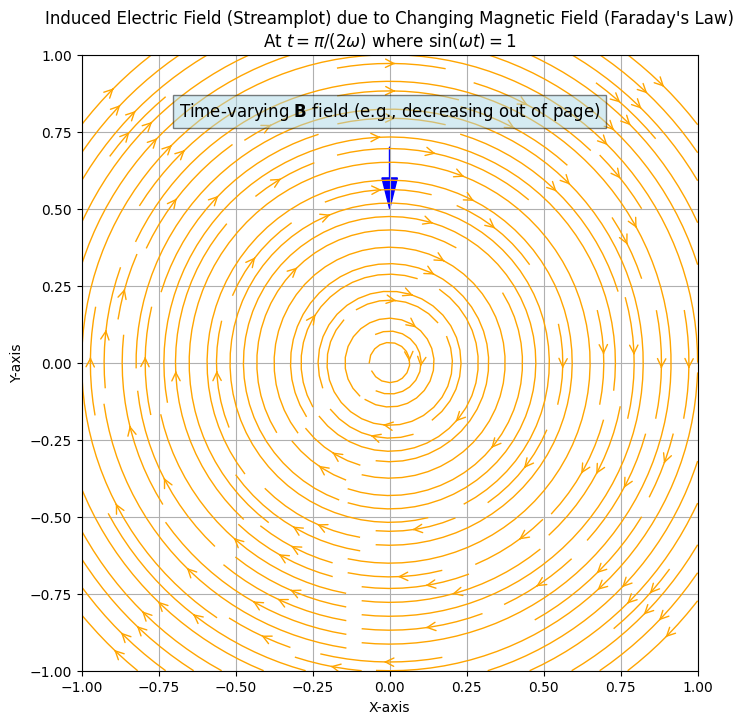

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import sympy
from sympy import symbols, Matrix, Rational, cos, sin, pi
from sympy.vector import curl, CoordSys3D
from mpl_toolkits.mplot3d import Axes3D

# Define symbols
t = symbols('t')
x_f, y_f, z_f = symbols('x y z') # Using x_f, y_f for function variables, to avoid conflict with numpy x, y
B0_sym, omega_sym = symbols('B_0 omega')

# Define the time-varying magnetic field (B pointing in z-direction)
B_sym_z = B0_sym * cos(omega_sym * t)
B_field_faraday = Matrix([0, 0, B_sym_z])

# Calculate dB/dt
dB_dt = B_field_faraday.diff(t)
print('dB/dt =\n', dB_dt)

# Define the induced Electric Field
E_x_induced = -Rational(1, 2) * y_f * B_sym_z.diff(t)
E_y_induced = Rational(1, 2) * x_f * B_sym_z.diff(t)
E_z_induced = 0 # This is an integer
E_field_faraday = Matrix([E_x_induced, E_y_induced, E_z_induced])
print('\nExample Induced Electric Field E =\n', E_field_faraday)

# Verify with curl using SymPy's vector module
R_faraday = CoordSys3D('R')
E_vec_faraday = (E_x_induced.subs({x_f: R_faraday.x, y_f: R_faraday.y}) * R_faraday.i +
                 E_y_induced.subs({x_f: R_faraday.x, y_f: R_faraday.y}) * R_faraday.j +
                 E_z_induced * R_faraday.k) # Corrected line: removed .subs() from E_z_induced

curl_E_sym = curl(E_vec_faraday)
print('\nCurl of E field =\n', curl_E_sym)

# --- Visualization ---

# Numerical values for constants and time
B0_val = 1.0  # Tesla
omega_val = 2 * np.pi  # rad/s (e.g., 1 Hz frequency)

# Choose a specific time instance for visualization.
# Let's choose t_val such that sin(omega_val * t_val) = 1, for clear visualization of the field pattern.
# For example, omega_val * t_val = pi/2
t_val = (np.pi / 2) / omega_val

# Create a 2D grid for the E-field visualization (since E_z = 0)
x_np = np.linspace(-1, 1, 15)
y_np = np.linspace(-1, 1, 15)
X_np, Y_np = np.meshgrid(x_np, y_np)

# Evaluate the symbolic expressions for E_x and E_y at the chosen time and with numerical constants
# We need to substitute the numerical values into the symbolic expressions.
E_x_func = sympy.lambdify((x_f, y_f, t, B0_sym, omega_sym), E_x_induced, 'numpy')
E_y_func = sympy.lambdify((x_f, y_f, t, B0_sym, omega_sym), E_y_induced, 'numpy')

Ex_val = E_x_func(X_np, Y_np, t_val, B0_val, omega_val)
Ey_val = E_y_func(X_np, Y_np, t_val, B0_val, omega_val)

# Plotting the induced Electric Field
plt.figure(figsize=(9, 8))
plt.quiver(X_np, Y_np, Ex_val, Ey_val, color='orange', scale=20, width=0.005) # Adjust scale as needed

# Add a conceptual representation of the changing B field
# For B_z = B0 * cos(omega * t), at t = pi/(2*omega), B_z = 0, but dB/dt is max negative.
# So we indicate a B field that was just positive and decreasing (or will be negative and increasing).
# Let's just put a label indicating a time-varying B field.
plt.text(0, 0.8, r'Time-varying $\mathbf{B}$ field (e.g., decreasing out of page)',
         horizontalalignment='center', fontsize=12, bbox=dict(facecolor='lightblue', alpha=0.5))
plt.arrow(0, 0.7, 0, -0.1, head_width=0.05, head_length=0.1, fc='blue', ec='blue') # Arrow for B decreasing

plt.title(f"Induced Electric Field due to Changing Magnetic Field (Faraday's Law)\n"
          r"At $t = \pi / (2\omega)$ where $\sin(\omega t) = 1$")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.gca().set_aspect('equal', adjustable='box')
plt.grid(True)
plt.show()

# You could also try a streamplot for smoother field lines if preferred
plt.figure(figsize=(9, 8))
plt.streamplot(X_np, Y_np, Ex_val, Ey_val, color='orange', linewidth=1, density=1.5, arrowstyle='->', arrowsize=1.5)
plt.text(0, 0.8, r'Time-varying $\mathbf{B}$ field (e.g., decreasing out of page)',
         horizontalalignment='center', fontsize=12, bbox=dict(facecolor='lightblue', alpha=0.5))
plt.arrow(0, 0.7, 0, -0.1, head_width=0.05, head_length=0.1, fc='blue', ec='blue')
plt.title(f"Induced Electric Field (Streamplot) due to Changing Magnetic Field (Faraday's Law)\n"
          r"At $t = \pi / (2\omega)$ where $\sin(\omega t) = 1$")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.gca().set_aspect('equal', adjustable='box')
plt.grid(True)
plt.show()

## 4. Ampère‑Maxwell Law

**Differential Form:**
$$\nabla \times \mathbf{B} = \mu_0 \mathbf{J} + \mu_0 \epsilon_0 \frac{\partial \mathbf{E}}{\partial t}$$

**Integral Form:**
$$\oint_C \mathbf{B} \cdot d\mathbf{l} = \mu_0 I_{enc} + \mu_0 \epsilon_0 \frac{d\Phi_E}{dt}$$

The Ampère‑Maxwell Law explains how magnetic fields are produced by electric currents and changing electric fields.

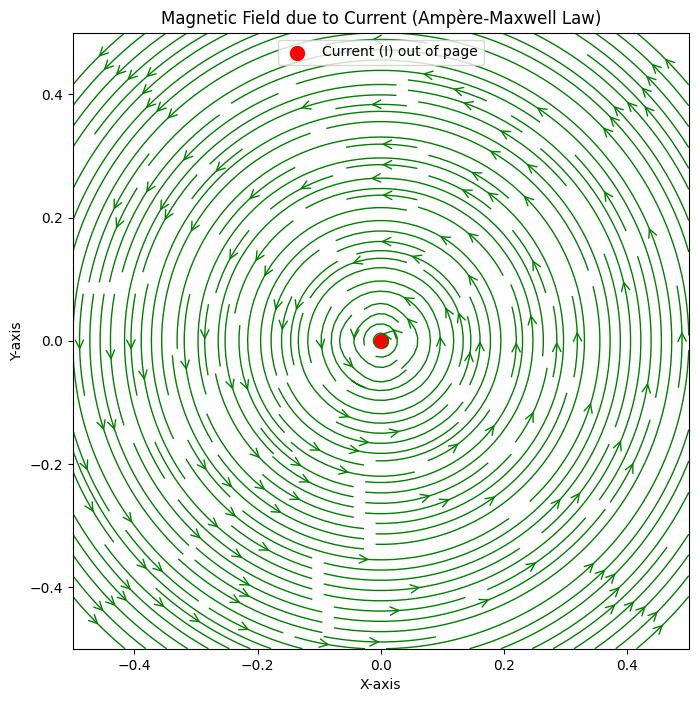


Time derivative of E field (dE/dt) =
 Matrix([[-E_0*omega*sin(omega*t)], [0], [0]])

Displacement Current Term (mu0 * epsilon0 * dE/dt) =
 Matrix([[-E_0*epsilon_0*mu_0*omega*sin(omega*t)], [0], [0]])

Example of Curl(B) for B = (0, z, 0):
 (-1)*R.i


In [5]:
# Constants
mu0 = 4 * np.pi * 1e-7  # Permeability of free space
I = 1.0  # Current in Amperes

# Grid for B‑field around a current
x_ampere = np.linspace(-0.5, 0.5, 20)
y_ampere = np.linspace(-0.5, 0.5, 20)
X_ampere, Y_ampere = np.meshgrid(x_ampere, y_ampere)

r_ampere = np.sqrt(X_ampere**2 + Y_ampere**2)
r_ampere[r_ampere == 0] = 1e-9

B_theta = (mu0 * I) / (2 * np.pi * r_ampere)
Bx_ampere = -B_theta * (Y_ampere / r_ampere)
By_ampere =  B_theta * (X_ampere / r_ampere)

plt.figure(figsize=(8, 8))
plt.streamplot(X_ampere, Y_ampere, Bx_ampere, By_ampere, color='green', linewidth=1, density=2, arrowstyle='->', arrowsize=1.5)
plt.scatter([0], [0], color='red', s=100, marker='o', label='Current (I) out of page')
plt.title('Magnetic Field due to Current (Ampère‑Maxwell Law)')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.gca().set_aspect('equal', adjustable='box')
plt.legend()
plt.show()

# Displacement current term (symbolic)
from sympy import Derivative
x_am, y_am, z_am, t_am = symbols('x y z t')
mu0_sym, epsilon0_sym = symbols('mu_0 epsilon_0')
E0_sym, omega_am = symbols('E_0 omega')
E_field_am = Matrix([E0_sym * cos(omega_am * t_am), 0, 0])
dE_dt_am = Derivative(E_field_am, t_am).doit()
print('\nTime derivative of E field (dE/dt) =\n', dE_dt_am)

displacement_current_term = mu0_sym * epsilon0_sym * dE_dt_am
print('\nDisplacement Current Term (mu0 * epsilon0 * dE/dt) =\n', displacement_current_term)

# Curl example
from sympy.vector import curl, CoordSys3D
R_ampere = CoordSys3D('R')
B_vec_ampere_test = R_ampere.z * R_ampere.j
curl_B_ampere_test = curl(B_vec_ampere_test)
print('\nExample of Curl(B) for B = (0, z, 0):\n', curl_B_ampere_test)

## Conclusion

This notebook introduced Maxwell's Equations through a combination of symbolic derivations and numerical visualizations. Understanding these equations illuminates the interplay between electricity and magnetism, forming the foundation for technologies ranging from power generation to wireless communication.